# PyTorch 第一个神经网络

以下实例展示了如何使用 PyTorch 实现一个简单的神经网络进行二分类任务训练。

网络结构包括输入层、隐藏层和输出层，使用了 ReLU 激活函数和 Sigmoid 激活函数。

采用了均方误差损失函数和随机梯度下降优化器。

训练过程是通过前向传播、计算损失、反向传播和参数更新来逐步调整模型参数。

In [1]:
# 导入PyTorch库
import torch
import torch.nn as nn

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0], 
                 [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
   nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
   nn.ReLU(),            # 隐藏层的ReLU激活函数
   nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
   nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
   y_pred = model(x)  # 前向传播，计算预测值
   loss = criterion(y_pred, y)  # 计算损失
   print('epoch: ', epoch, 'loss: ', loss.item())  # 打印损失值

   optimizer.zero_grad()  # 清零梯度
   loss.backward()  # 反向传播，计算梯度
   optimizer.step()  # 更新模型参数

epoch:  0 loss:  0.2333965003490448
epoch:  1 loss:  0.23334868252277374
epoch:  2 loss:  0.23330089449882507
epoch:  3 loss:  0.23325315117835999
epoch:  4 loss:  0.2332053929567337
epoch:  5 loss:  0.233157679438591
epoch:  6 loss:  0.2331099957227707
epoch:  7 loss:  0.23306231200695038
epoch:  8 loss:  0.23301473259925842
epoch:  9 loss:  0.23296710848808289
epoch:  10 loss:  0.23291952908039093
epoch:  11 loss:  0.23287196457386017
epoch:  12 loss:  0.2328244000673294
epoch:  13 loss:  0.23277691006660461
epoch:  14 loss:  0.23272943496704102
epoch:  15 loss:  0.23268195986747742
epoch:  16 loss:  0.2326345145702362
epoch:  17 loss:  0.23258709907531738
epoch:  18 loss:  0.23253972828388214
epoch:  19 loss:  0.2324923574924469
epoch:  20 loss:  0.23244500160217285
epoch:  21 loss:  0.2323976755142212
epoch:  22 loss:  0.2323503941297531
epoch:  23 loss:  0.23230309784412384
epoch:  24 loss:  0.23225581645965576
epoch:  25 loss:  0.23220856487751007
epoch:  26 loss:  0.232161328196

**定义网络参数**：

n_in, n_h, n_out, batch_size = 10, 5, 1, 10

- n_in：输入层大小为 10，即每个数据点有 10 个特征。

- n_h：隐藏层大小为 5，即隐藏层包含 5 个神经元。

- n_out：输出层大小为 1，即输出一个标量，表示二分类结果（0 或 1）。

- batch_size：每个批次包含 10 个样本。

**生成输入数据和目标数据**：

x = torch.randn(batch_size, n_in)  # 随机生成输入数据

y = torch.tensor([[1.0], [0.0], [0.0], 
                 [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据
                 
- x：随机生成一个形状为 (10, 10) 的输入数据矩阵，表示 10 个样本，每个样本有 10 个特征。

- y：目标输出数据（标签），表示每个输入样本的类别标签（0 或 1），是一个 10×1 的张量。

**定义神经网络模型**：

model = nn.Sequential(  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nn.ReLU(),            # 隐藏层的ReLU激活函数  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nn.Sigmoid()           # 输出层的Sigmoid激活函数  
)  

nn.Sequential 用于按顺序定义网络层。

- nn.Linear(n_in, n_h)：定义输入层到隐藏层的线性变换，输入特征是 10 个，隐藏层有 5 个神经元。

- nn.ReLU()：在隐藏层后添加 ReLU 激活函数，增加非线性。

- nn.Linear(n_h, n_out)：定义隐藏层到输出层的线性变换，输出为 1 个神经元。

- nn.Sigmoid()：输出层使用 Sigmoid 激活函数，将结果映射到 0 到 1 之间，用于二分类任务。

**定义损失函数和优化器**：

criterion = torch.nn.MSELoss()  # 使用均方误差损失函数

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 使用随机梯度下降优化器，学习率为 0.01

**训练循环**：

for epoch in range(50):  # 训练50轮  
&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model(x)  # 前向传播，计算预测值  
&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)  # 计算损失  
&nbsp;&nbsp;&nbsp;&nbsp;print('epoch: ', epoch, 'loss: ', loss.item())  # 打印损失值  

&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()  # 清零梯度  
&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()  # 反向传播，计算梯度  
&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()  # 更新模型参数 
   
- for epoch in range(50)：进行 50 次训练迭代。

- y_pred = model(x)：进行前向传播，使用当前模型参数计算输入数据 x 的预测值。

- loss = criterion(y_pred, y)：计算预测值和目标值 y 之间的损失。

- optimizer.zero_grad()：清除上一轮训练时的梯度值。

- loss.backward()：反向传播，计算损失函数相对于模型参数的梯度。

- optimizer.step()：根据计算出的梯度更新模型参数。

可视化代码：

Epoch [1/50], Loss: 0.3218
Epoch [2/50], Loss: 0.3215
Epoch [3/50], Loss: 0.3211
Epoch [4/50], Loss: 0.3207
Epoch [5/50], Loss: 0.3203
Epoch [6/50], Loss: 0.3200
Epoch [7/50], Loss: 0.3196
Epoch [8/50], Loss: 0.3192
Epoch [9/50], Loss: 0.3188
Epoch [10/50], Loss: 0.3185
Epoch [11/50], Loss: 0.3181
Epoch [12/50], Loss: 0.3177
Epoch [13/50], Loss: 0.3174
Epoch [14/50], Loss: 0.3170
Epoch [15/50], Loss: 0.3166
Epoch [16/50], Loss: 0.3163
Epoch [17/50], Loss: 0.3159
Epoch [18/50], Loss: 0.3156
Epoch [19/50], Loss: 0.3152
Epoch [20/50], Loss: 0.3148
Epoch [21/50], Loss: 0.3145
Epoch [22/50], Loss: 0.3141
Epoch [23/50], Loss: 0.3138
Epoch [24/50], Loss: 0.3134
Epoch [25/50], Loss: 0.3131
Epoch [26/50], Loss: 0.3127
Epoch [27/50], Loss: 0.3123
Epoch [28/50], Loss: 0.3120
Epoch [29/50], Loss: 0.3116
Epoch [30/50], Loss: 0.3113
Epoch [31/50], Loss: 0.3109
Epoch [32/50], Loss: 0.3106
Epoch [33/50], Loss: 0.3103
Epoch [34/50], Loss: 0.3099
Epoch [35/50], Loss: 0.3096
Epoch [36/50], Loss: 0.3092
E

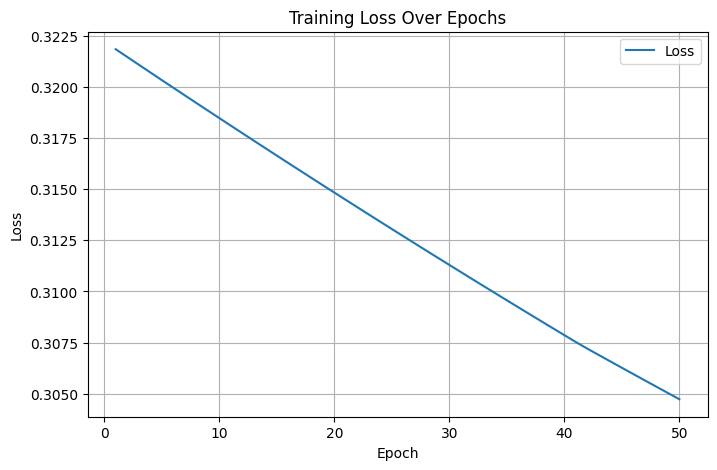

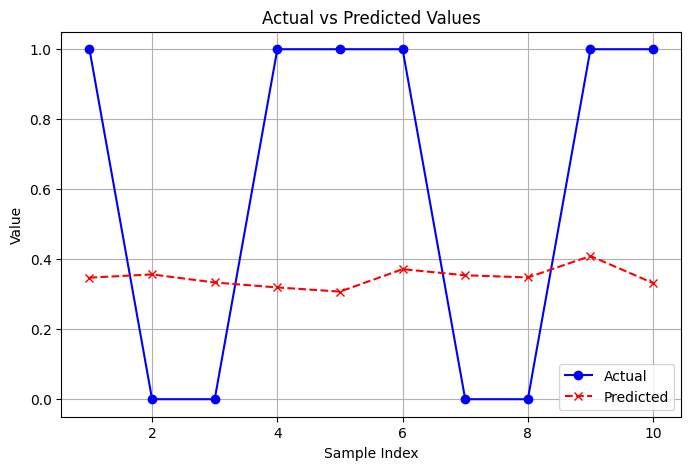

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0],
                  [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
    nn.ReLU(),            # 隐藏层的ReLU激活函数
    nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
    nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 用于存储每轮的损失值
losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
    y_pred = model(x)  # 前向传播，计算预测值
    loss = criterion(y_pred, y)  # 计算损失
    losses.append(loss.item())  # 记录损失值
    print(f'Epoch [{epoch+1}/50], Loss: {loss.item():.4f}')  # 打印损失值

    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

**另外一个实例**

我们假设有一个二维数据集，目标是根据点的位置将它们分类到两个类别中（例如，红色和蓝色点）。

以下实例展示了如何使用神经网络完成简单的二分类任务，为更复杂的任务奠定了基础，通过 PyTorch 的模块化接口，神经网络的构建、训练和可视化都非常直观。

**1、数据准备**

首先，我们生成一些简单的二维数据：

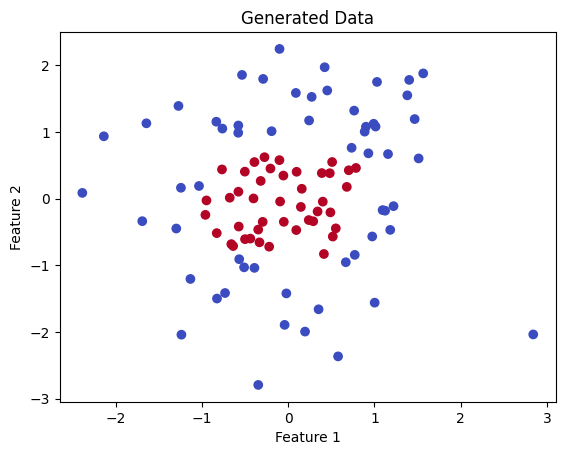

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

数据说明：

- data 是输入的二维点，每个点有两个特征。

- labels 是目标分类，点在圆形区域内为 1，否则为 0。

**2、定义神经网络**

用 PyTorch 创建一个简单的前馈神经网络。

前馈神经网络使用了一层隐藏层，通过简单的线性变换和激活函数捕获数据的非线性模式。

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

# 实例化模型
model = SimpleNN()

**3、定义损失函数和优化器**

In [4]:
# 定义二分类的损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

**4、训练模型**

用数据训练模型，让它学会分类。

In [5]:
# 训练
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6809
Epoch [20/100], Loss: 0.6737
Epoch [30/100], Loss: 0.6693
Epoch [40/100], Loss: 0.6661
Epoch [50/100], Loss: 0.6630
Epoch [60/100], Loss: 0.6598
Epoch [70/100], Loss: 0.6566
Epoch [80/100], Loss: 0.6530
Epoch [90/100], Loss: 0.6494
Epoch [100/100], Loss: 0.6456


**5、测试模型并可视化结果**

我们测试模型，并在图像上绘制决策边界。

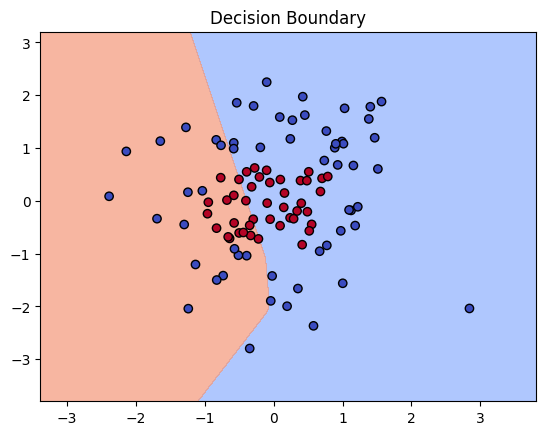

In [6]:
# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, data)

**6、完整代码**

完整代码如下：

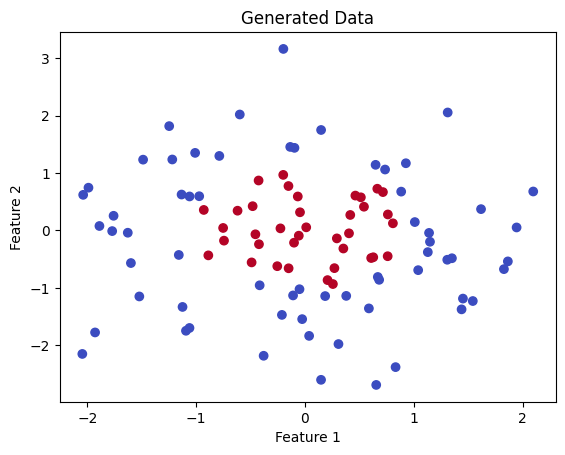

Epoch [10/100], Loss: 0.6742
Epoch [20/100], Loss: 0.6373
Epoch [30/100], Loss: 0.6167
Epoch [40/100], Loss: 0.6048
Epoch [50/100], Loss: 0.5975
Epoch [60/100], Loss: 0.5923
Epoch [70/100], Loss: 0.5882
Epoch [80/100], Loss: 0.5849
Epoch [90/100], Loss: 0.5820
Epoch [100/100], Loss: 0.5793


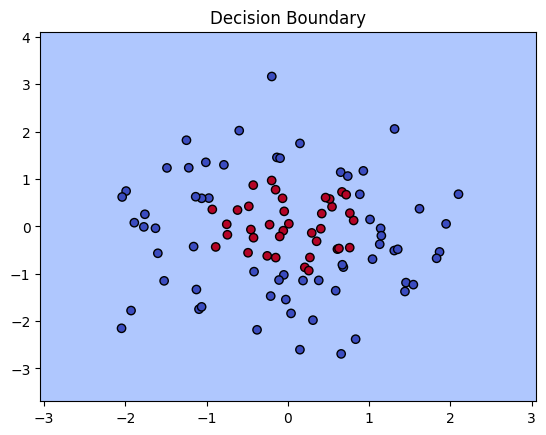

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 定义前馈神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

# 实例化模型
model = SimpleNN()

# 定义损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

# 训练
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, data)